<a href="https://colab.research.google.com/github/cuongle2002/MachineLearning-/blob/main/FINAL_PROJECT_ML(LOGISTIC_REGRESSION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
url = '/content/fruits.csv'
#load data
data = pd.read_csv(url)
#take first 10 row
data.head(10)


,Unnamed: 0,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,0,1,apple,granny_smith,198.04,8.47,7.29,0.54
1,1,2,mandarin,mandarin,88.73,6.31,4.55,0.82
2,2,3,orange,spanish_jumbo,355.71,9.05,9.01,0.79
3,3,4,lemon,unknown,124.01,5.88,8.03,0.73
4,4,2,mandarin,mandarin,80.54,6.30,4.83,0.83
5,5,2,mandarin,mandarin,80.63,5.77,4.23,0.80
6,6,2,mandarin,mandarin,82.66,5.92,4.11,0.77
7,7,2,mandarin,mandarin,73.22,5.70,3.96,0.86
8,8,1,apple,braeburn,178.29,7.17,7.50,0.95
9,9,1,apple,braeburn,166.64,7.67,6.88,0.84


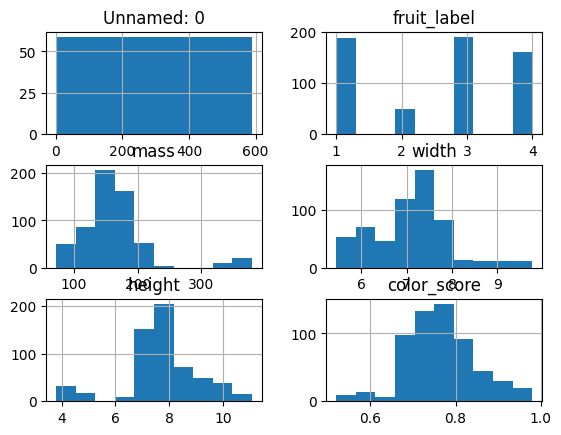

In [ ]:
# khổ phân bố dữ liệu 
import matplotlib.pyplot as plt 
data.hist()   
plt.show()

In [ ]:
#mối tương quan dữ liệu
correlation = data.corr()
print(correlation)

             Unnamed: 0  fruit_label      mass     width    height  \
Unnamed: 0     1.000000     0.076370 -0.006544 -0.034609  0.038300   
fruit_label    0.076370     1.000000  0.029044 -0.303341  0.499760   
mass          -0.006544     0.029044  1.000000  0.828898  0.590469   
width         -0.034609    -0.303341  0.828898  1.000000  0.365579   
height         0.038300     0.499760  0.590469  0.365579  1.000000   
color_score   -0.041803    -0.308926 -0.086251 -0.058965 -0.240405   

             color_score  
Unnamed: 0     -0.041803  
fruit_label    -0.308926  
mass           -0.086251  
width          -0.058965  
height         -0.240405  
color_score     1.000000  


<ipython-input-9-d69c95e8f4f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

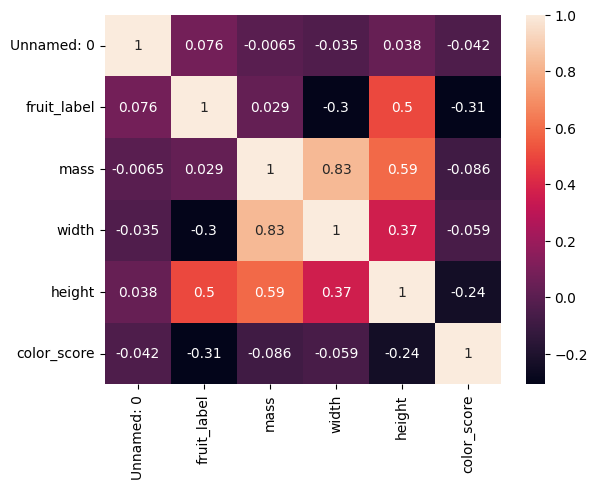

In [ ]:
#Vẽ ma trận độ tương quan dưới dạng heatmap
import seaborn as sns 
sns.heatmap(correlation, annot=True ) #màu càng đậm giá trị càng thấp 

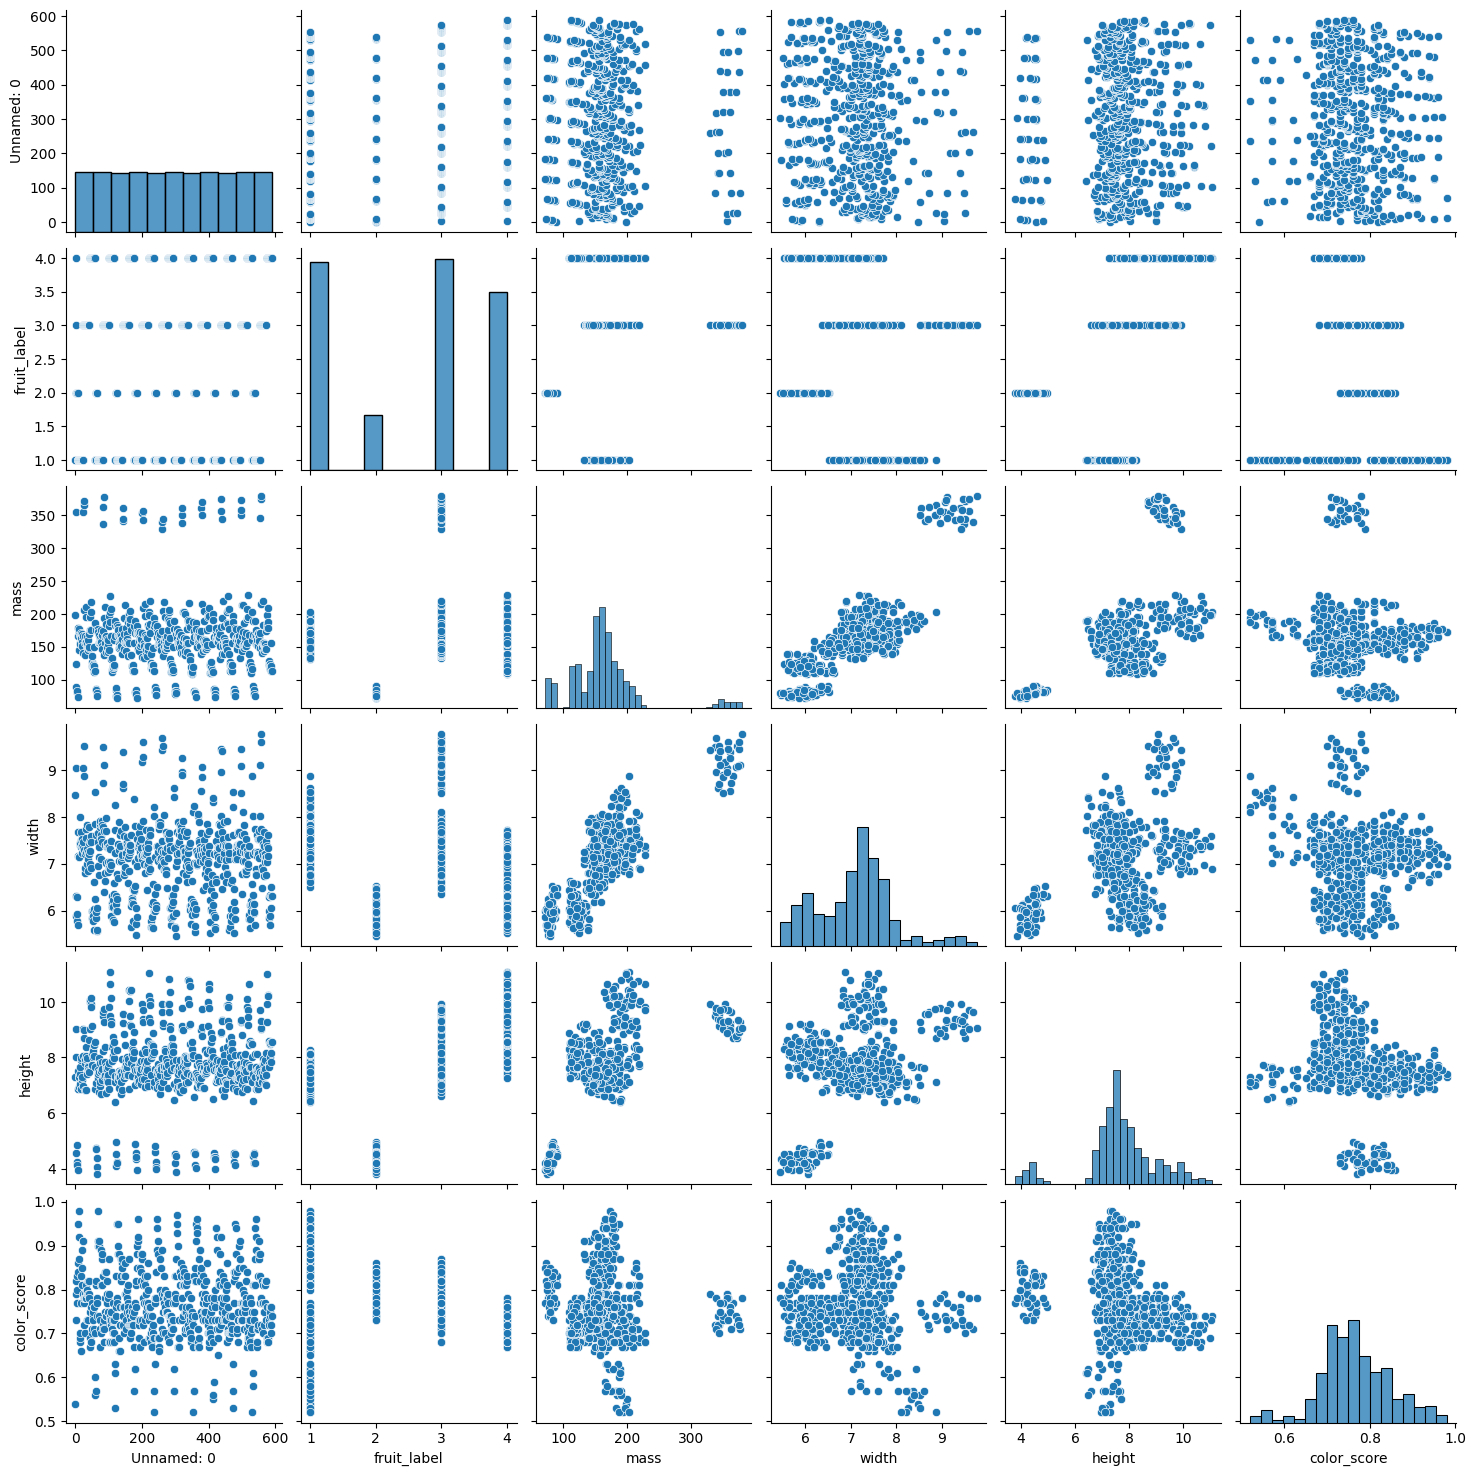

In [ ]:
#Hiển thị quan hệ giữa hai biến trong tập dữ liệu 
sns.pairplot(data) 

In [ ]:
#phân loại đầu vào và đầu ra gán cho biến X và Y 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#X và Y là code tham khảo
Y = data['fruit_name']
X = data[['mass','width','height','color_score']]

#Code được thêm vào
#Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Train từng cái và test từng cái
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [ ]:
#Load thư viện LOGISTIC REGRESSION
#Build model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

#train model 
model = model.fit(X,Y)

#Dự đoán mô hình
Y_pred = model.predict(X_test)
print("Coefficients",model.coef_, '\n')
print("Intercepts", model.intercept_)


Coefficients [[ 0.54440865  2.27370783 -1.78799429  0.51041462]
 [-0.60780272 -2.20536962  4.67828423 -1.1200658 ]
 [-1.51137972 -0.74749614 -2.87168047  0.44324794]
 [ 1.57477379  0.67915793 -0.01860947  0.16640324]] 

Intercepts [ 1.872647   -0.72339948 -3.68345158  2.53420406]


In [ ]:
#Load thư viện tính toán và báo cáo kết quả đánh giá 
from sklearn.metrics import classification_report
print(classification_report(Y_test,
                            Y_pred,
                            output_dict=True))


{'apple': {'precision': 0.7777777777777778, 'recall': 0.6666666666666666, 'f1-score': 0.717948717948718, 'support': 21}, 'lemon': {'precision': 1.0, 'recall': 0.9375, 'f1-score': 0.967741935483871, 'support': 16}, 'mandarin': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9}, 'orange': {'precision': 0.5294117647058824, 'recall': 0.6923076923076923, 'f1-score': 0.5999999999999999, 'support': 13}, 'accuracy': 0.7966101694915254, 'macro avg': {'precision': 0.826797385620915, 'recall': 0.8241185897435896, 'f1-score': 0.8214226633581472, 'support': 59}, 'weighted avg': {'precision': 0.817215021601861, 'recall': 0.7966101694915254, 'f1-score': 0.8027253227909324, 'support': 59}}


In [ ]:
#LOAD thư viện tính độ chính xác 
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f" % accuracy)
    

Accuracy: 0.80


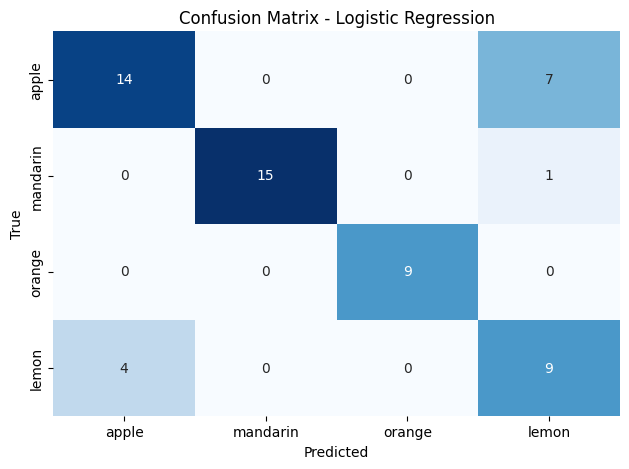

In [ ]:
# Load libraries
from sklearn.metrics import confusion_matrix
#Create confusion matrix
matrix = confusion_matrix(Y_test, Y_pred)
#Create pandas dataframe 
import pandas as pd
#Tạo data frame mới từ ma trận matrix dùng để tạo ra ma trận lỗi 
dataframe = pd.DataFrame(matrix, index = Y[:4], columns = Y[:4])
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression"), plt.tight_layout()
plt.ylabel("True"), plt.xlabel("Predicted")
plt.show()


In [ ]:
# Load thư viện để tạo ra một tập dữ liệu mẫu cho bài toán phân loại nhị phân (binary classification).
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples = 10000,
                           n_features = 10,
                           n_classes= 2,
                           n_informative = 3,
                           random_state = 3)

In [ ]:
#split into training and test data
#Train từng cái và test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [ ]:
#Bởi vì ma trận (4.4) nên chỉ giữ lại 4 cột đầu tiên
X_test_selected = X_test[:, :4]

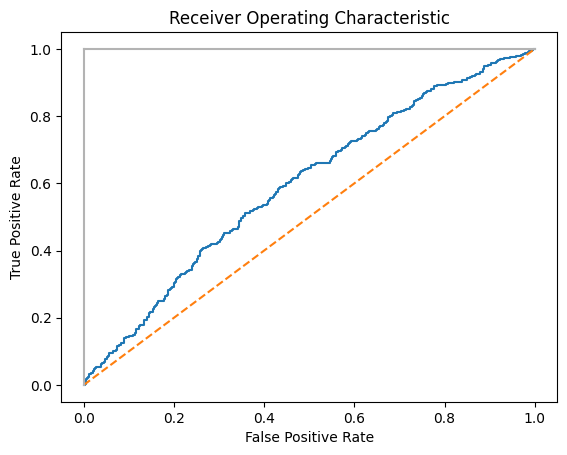

In [ ]:
# Sử dụng ROC curve để vẽ biểu đồ đánh giá khả năng phân loại của mô hình, thể hiện tỉ lệ giữa TPR và FPR
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
target_probabilities =  model.predict_proba(X_test_selected)[:,1]

#Tính toán các FPR và TPR = ROC curve
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, target_probabilities)

# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()


In [ ]:
#Sử dụng thê 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
# Chia dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
import numpy as np
# Create range of candidate penalty hyperparameter values
penalty = ['l1', 'l2']
# Create range of candidate regularization hyperparameter values
C = np.logspace(0, 4, 10)


In [ ]:
# Create dictionary hyperparameter candidates
params = dict(C=C, penalty=penalty)

In [ ]:
# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, params, cv=5,verbose=0) #Cv: cross-vadilation

In [ ]:
# Tìm kiếm siêu tham số tốt nhất
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [ ]:
# Lấy thông tin về siêu tham số tốt nhất
best_params = grid_search.best_params_

In [ ]:
print("Siêu tham số tốt nhất:", best_params)

Siêu tham số tốt nhất: {'C': 1.0, 'penalty': 'l2'}


In [ ]:
# Đánh giá mô hình trên tập kiểm thử
accuracy = grid_search.score(X_test, Y_test)
print("Độ chính xác trên tập kiểm thử:", accuracy)

Độ chính xác trên tập kiểm thử: 0.8283333333333334


In [ ]:
#Khi sử dụng gridsearchCV độ c/x lệch nhau khoảng 0.2% so với thuật toán LogisticReGression 